In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
breast = pd.read_table(r'data_set\breast-cancer-wisconsin.data.txt', delimiter=',')
breast

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
breast.columns, breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


(Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
        'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
        'norm_nucleoli', 'mitoses', 'class'],
       dtype='object'),
 None)

In [5]:
breast_ = breast.rename(columns={'class': 'class_'})

In [6]:
breast_

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class_
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
# 训练集和测试集划分
# 分开特征和目标变量
# breast_.drop(columns='class_')
X = breast_[['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses']]
y = breast_[['class_']]

In [ ]:
['id', '肿块厚度', '单一细胞大小的均匀性', '单一细胞形状的均匀性', '边缘粘附性', '单一上皮细胞大小', '裸核', '细胞染色质', '正常核仁', '有丝分裂']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# 测试集
breast_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
breast_train

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class_
0,1143978,5,2,1,1,2,1,3,1,1,2
1,1108449,5,3,3,4,2,4,3,4,1,4
2,1224329,1,1,1,2,2,1,3,1,1,2
3,1321931,5,1,1,1,2,1,2,1,1,2
4,1186936,2,1,3,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
554,1123061,6,10,2,8,10,2,7,8,10,4
555,1170419,10,10,10,8,2,10,4,1,1,4
556,390840,8,4,7,1,3,10,3,9,2,4
557,1294562,10,8,10,1,3,10,5,1,1,4


In [52]:
breast_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
breast_test

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class_
0,1193683,1,1,2,1,3,?,1,1,1,2
1,1217952,4,1,1,1,2,1,2,1,1,2
2,1176187,3,1,1,1,2,1,3,1,1,2
3,1192325,5,5,5,6,3,10,3,1,1,4
4,733639,3,1,1,1,2,?,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
135,1059552,1,1,1,1,2,1,3,1,1,2
136,1223793,6,10,7,7,6,4,8,10,2,4
137,1276091,5,1,1,3,4,1,3,2,1,2
138,486662,2,1,1,2,2,1,3,1,1,2


In [53]:
# 逻辑回归
breast_glmmodel_train = smf.glm('class_ ~ id + clump_thickness + unif_cell_size + unif_cell_shape + marg_adhesion + single_epith_cell_size + bare_nuclei + bland_chrom + norm_nucleoli + mitoses', data=breast_train).fit()
breast_glmmodel_train

In [54]:
breast_glmmodel_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 class_   No. Observations:                  559
Model:                            GLM   Df Residuals:                      539
Model Family:                Gaussian   Df Model:                           19
Link Function:               Identity   Scale:                         0.14233
Method:                          IRLS   Log-Likelihood:                -238.10
Date:                Thu, 29 Aug 2024   Deviance:                       76.718
Time:                        09:33:59   Pearson chi2:                     76.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9956
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.6127      0.047     34.262      0.000       1.520       1.705
bare_nuclei[T.10]          0.8399      0.066     12.778      0.000       0.711       0.969
bare_nuclei[T.2]           0.1085      0.084      1.287      0.198      -0.057       0.274
bare_nuclei[T.3]           0.4570      0.088      5.209      0.000       0.285       0.629
bare_nuclei[T.4]           0.6321      0.110      5.752      0.000       0.417       0.848
bare_nuclei[T.5]           0.4850      0.085      5.678      0.000       0.318       0.652
bare_nuclei[T.6]           1.1796      0.278      4.251      0.000       0.636       1.724
bare_nuclei[T.7]           0.7820      0.154      5.083      0.000       0.480       1.084
bare_nuclei[T.8]           0.7473      0.116      6.467      0.000       0.521       0.974
bare_nuclei[T.9]           0.9998      0.145      6.911      0.000       0.716       1.283
bare_nuclei[T.?]          -0.0114      0.118     -0.097      0.923      -0.242       0.219
id                     -1.725e-08   2.38e-08     -0.724      0.469    -6.4e-08    2.95e-08
clump_thickness            0.0575      0.008      7.250      0.000       0.042       0.073
unif_cell_size             0.0359      0.015      2.327      0.020       0.006       0.066
unif_cell_shape            0.0412      0.015      2.816      0.005       0.013       0.070
marg_adhesion              0.0153      0.009      1.750      0.080      -0.002       0.032
single_epith_cell_size     0.0215      0.011      1.885      0.059      -0.001       0.044
bland_chrom                0.0450      0.011      3.926      0.000       0.023       0.067
norm_nucleoli              0.0186      0.009      2.183      0.029       0.002       0.035
mitoses                -2.256e-05      0.011     -0.002      0.998      -0.022       0.022
==========================================================================================
"""

In [55]:
# 对测试集数据进行预测
predict_probs = breast_glmmodel_train.predict(breast_test)
predict_probs

# predict(fit.logit, df.validate, type='response)
# factor(prob > .5, levels = c(False, True), labels=c('benign', 'malignant'))
# table(df.validate$class, logit.pred, dnn=c('Actual', 'Predicted'))

0      1.899783
1      2.065551
2      2.053746
3      3.414663
4      2.049934
         ...   
135    1.940788
136    3.997749
137    2.259175
138    2.023446
139    2.261556
Length: 140, dtype: float64

In [56]:
# 将预测概率转换为类别数据
predict_labels = predict_probs.apply(lambda x: 2 if x > 0.5 else 4)
predict_labels.value_counts()

2    140
Name: count, dtype: int64

In [49]:
confusion_matrix(y_test, predict_labels)

array([[143,   0],
       [ 67,   0]], dtype=int64)

In [57]:
print(classification_report(y_test, predict_labels))

              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
breast_dropna = breast_[breast_.bare_nuclei != '?']

In [77]:
breast_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      683 non-null    int64 
 1   clump_thickness         683 non-null    int64 
 2   unif_cell_size          683 non-null    int64 
 3   unif_cell_shape         683 non-null    int64 
 4   marg_adhesion           683 non-null    int64 
 5   single_epith_cell_size  683 non-null    int64 
 6   bare_nuclei             683 non-null    object
 7   bland_chrom             683 non-null    int64 
 8   norm_nucleoli           683 non-null    int64 
 9   mitoses                 683 non-null    int64 
 10  class_                  683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [78]:
X_dropna = breast_dropna.drop(columns='class_')
y_dropna = breast_dropna[['class_']]
X_train_dropna, X_test_dropna, y_train_dropna, y_test_dropna = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)

In [79]:
# 决策树，基本思想是对预测变量进行二元分离，从而构造一棵可用于预测新样本单元所属类别的树
# 经典决策树
# criterion：
# 
clf = DecisionTreeClassifier(
    criterion='enc' # gini, econtropy
    ,random_state=42
    ,max_depth = 10
    ,
)
clf.fit(X_train_dropna, y_train_dropna)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 每个特征的重要性
clf.feature_importances_

In [80]:
predict_probs_dropna = clf.predict(X_test_dropna)
predict_probs_dropna

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2], dtype=int64)

In [81]:
accuracy_score(predict_probs_dropna, y_test_dropna)

0.9416058394160584

In [82]:
confusion_matrix(y_test_dropna, predict_probs_dropna)

array([[78,  1],
       [ 7, 51]], dtype=int64)

In [83]:
print(classification_report(y_test_dropna, predict_probs_dropna))

              precision    recall  f1-score   support

           2       0.92      0.99      0.95        79
           4       0.98      0.88      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 24694 (\N{CJK UNIFIED IDEOGRAPH-6076}) missing from current font.
  ann.update_bbox_position_size(renderer)


[Text(0.532608695652174, 0.9444444444444444, 'unif_cell_size <= 3.5\ngini = 0.443\nsamples = 546\nvalue = [365, 181]\nclass = 良性'),
 Text(0.34782608695652173, 0.8333333333333334, 'bare_nuclei <= 5.5\ngini = 0.11\nsamples = 378\nvalue = [356, 22]\nclass = 良性'),
 Text(0.2608695652173913, 0.7222222222222222, 'norm_nucleoli <= 8.5\ngini = 0.053\nsamples = 365\nvalue = [355, 10]\nclass = 良性'),
 Text(0.21739130434782608, 0.6111111111111112, 'bare_nuclei <= 2.5\ngini = 0.027\nsamples = 360\nvalue = [355, 5]\nclass = 良性'),
 Text(0.17391304347826086, 0.5, 'gini = 0.0\nsamples = 333\nvalue = [333, 0]\nclass = 良性'),
 Text(0.2608695652173913, 0.5, 'clump_thickness <= 5.5\ngini = 0.302\nsamples = 27\nvalue = [22, 5]\nclass = 良性'),
 Text(0.21739130434782608, 0.3888888888888889, 'unif_cell_shape <= 2.5\ngini = 0.211\nsamples = 25\nvalue = [22, 3]\nclass = 良性'),
 Text(0.13043478260869565, 0.2777777777777778, 'single_epith_cell_size <= 1.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = 良性'),
 Te

c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from current font.
  func(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  func(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 24694 (\N{CJK UNIFIED IDEOGRAPH-6076}) missing from current font.
  func(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Administra

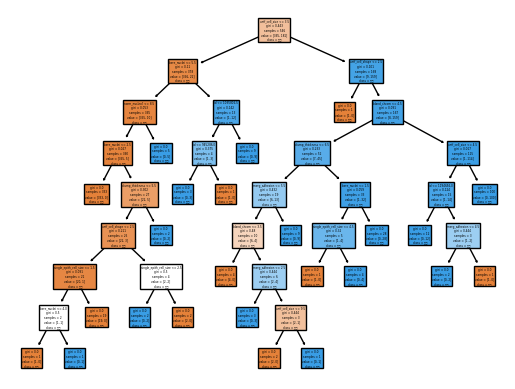

In [85]:
plot_tree(clf, filled=True, feature_names=X_train_dropna.columns, class_names=['良性', '恶性'])

In [ ]:
# 条件推断树